LUNG CANCER DETECTION -CHEST XRAY IMAGES 

*USING KERAS AND TENSORFLOW*

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image

# New Section

In [ ]:
from google.colab import drive


In [ ]:
train_normal='/content/drive/MyDrive/chest_xray/train/NORMAL'
test_normal='/content/drive/MyDrive/chest_xray/test/NORMAL'
train_pneu='/content/drive/MyDrive/chest_xray/train/PNEUMONIA'
test_pneu='/content/drive/MyDrive/chest_xray/test/PNEUMONIA'
val_normal='/content/drive/MyDrive/chest_xray/val/NORMAL'
val_pneu='/content/drive/MyDrive/chest_xray/val/PNEUMONIA'

In [ ]:
len(train_normal)


46

In [ ]:
len(train_pneu)

49

In [ ]:
len(test_normal)

45

In [ ]:
len(test_pneu)

48

DATA VISUALISATION - Normal Lungs

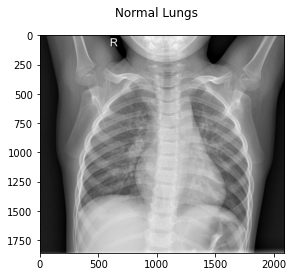

In [ ]:
plt.suptitle('Normal Lungs')
img =image.load_img("/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
plt.imshow(img)

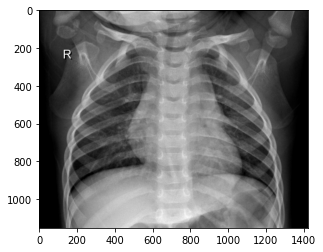

In [ ]:
img =image.load_img("/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
plt.imshow(img)

DATA VISUALISATION - Pneumonia Lungs

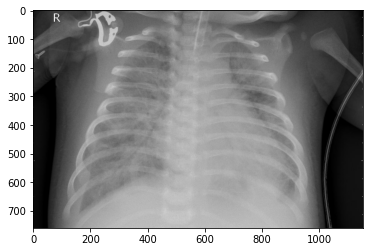

In [ ]:
img =image.load_img("/content/drive/MyDrive/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")
plt.imshow(img)

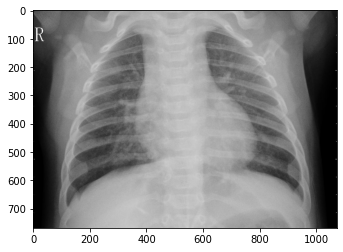

In [ ]:
img=image.load_img("/content/drive/MyDrive/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg")
plt.imshow(img)

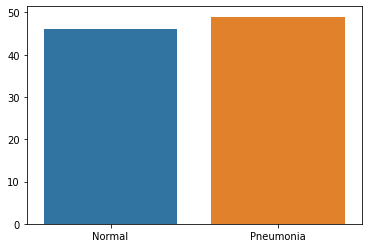

In [ ]:
sns.barplot(x=['Normal','Pneumonia'],y=[len(train_normal),len(train_pneu)])

DATA PREPROCESSING

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
from keras import regularizers

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                  rotation_range=0.4,
                                  zoom_range=0.4)
test_datagen=ImageDataGenerator(rescale=1./255)

train_set=train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',target_size=(224,224),batch_size=8,class_mode='binary')

val_set=train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',target_size=(224,224),batch_size=8,shuffle=True,class_mode='binary')

test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',target_size=(224,224),batch_size=8,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ReduceLROnPlateau
RLR = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=3,
                                         cooldown=3,
                                         min_lr=0.01,
                                        verbose=1)

callbacks = [RLR]

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_set,
                    steps_per_epoch=5216//8,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=624//8,callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

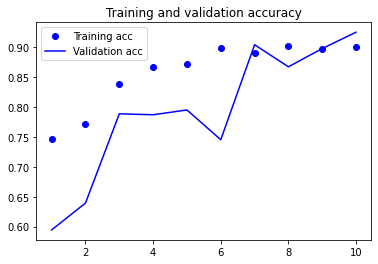

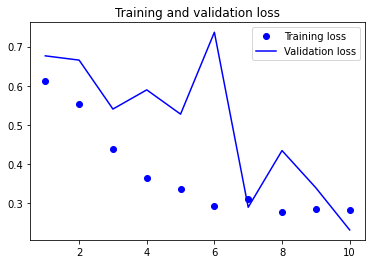

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss'
        )
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [ ]:
ev = model.evaluate(val_set)
print("\n%s: %.f%%" % (model.metrics_names[1], ev[1]*100))

2/2 [==============================] - 0s 170ms/step - loss: 0.5280 - accuracy: 0.9375

accuracy: 94%
